In [8]:
from naccidents_vs_dates import *
import matplotlib.pyplot as plt

naccidents_vs_dates_out = naccidents_vs_dates()

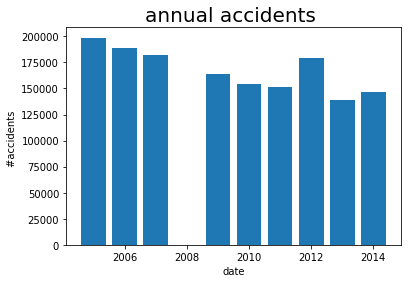

In [9]:
plt.bar(list(naccidents_vs_dates_out.keys()),
        list(naccidents_vs_dates_out.values()))
plt.xlabel('date')
plt.ylabel('#accidents ')
plt.title('annual accidents ', fontsize=20)
plt.show()